# Кластеризация датасета ирисов Фишера

Задача № 19 прошлого года:
Разделить выборку ирисы Фишера на кластеры. Проиллюстрировать на графиках результаты кластеризации для различного числа кластеров, выделить кластеры разными цветами.

In [65]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import cross_validation
from sklearn import metrics 
from pandas import DataFrame
import  matplotlib.pyplot as plt
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [66]:
#upload data
iris = datasets.load_iris()
print (iris.feature_names)
print (iris.data[:5])
print (iris.target_names)
print (iris.target)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [67]:
#modify data, add coloums name, sort, target var
iris_frame = DataFrame(iris.data)
iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])

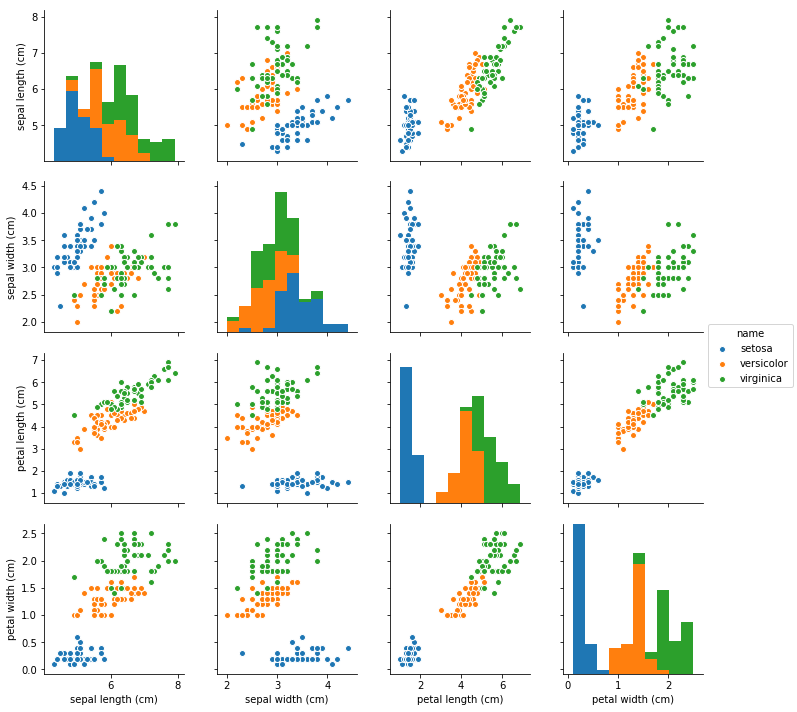

In [68]:
#define how features correlate
import seaborn as sns
sns.pairplot(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')

In [73]:
#разбиваем выборку на обучающую и тестовую
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], iris_frame[['target']], test_size = 0.4)

#model_1 - 3 clasters
model_1 = KMeans(n_clusters = 3, random_state = 0)
model_1.fit(train_data)
model_predictions_1 = model_1.predict(test_data)
print (metrics.accuracy_score(test_labels, model_predictions_1))

#model_2 - 2 clasters
model_2 = KMeans(n_clusters = 2, random_state = 0)
model_2.fit(train_data)
model_predictions_2 = model_2.predict(test_data)
print (metrics.accuracy_score(test_labels, model_predictions_2))

#model_3 - 4 clasters
model_3 = KMeans(n_clusters = 4, random_state = 0)
model_3.fit(train_data)
model_predictions_3 = model_3.predict(test_data)
print (metrics.accuracy_score(test_labels, model_predictions_3))

0.9
0.6333333333333333
0.2


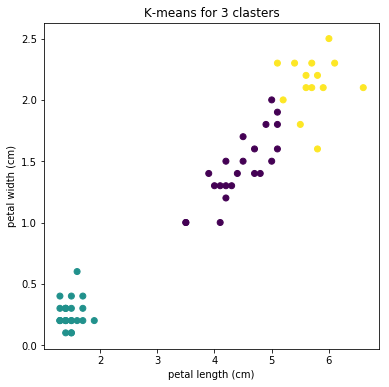

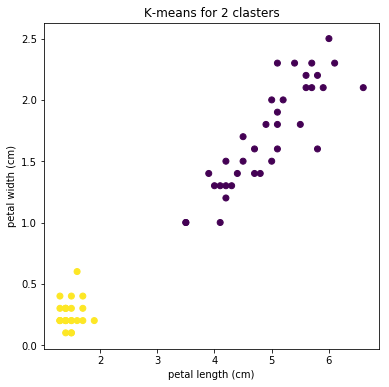

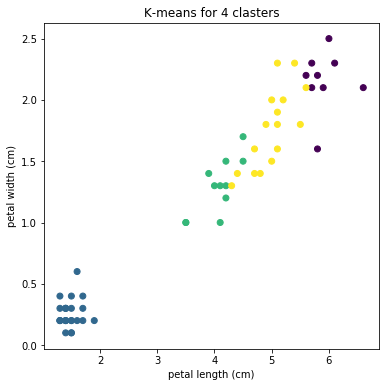

In [72]:
fig = plt.figure(1, figsize=(6, 6))
plt.ylabel('petal width (cm)')
plt.xlabel('petal length (cm)')
plt.title('K-means for 3 clasters')
plt.scatter(test_data['petal length (cm)'], test_data['petal width (cm)'], c = model_predictions_1.astype(np.float))
plt.show()

fig = plt.figure(1, figsize=(6, 6))
plt.ylabel('petal width (cm)')
plt.xlabel('petal length (cm)')
plt.title('K-means for 2 clasters')
plt.scatter(test_data['petal length (cm)'], test_data['petal width (cm)'], c = model_predictions_2.astype(np.float))
plt.show()

fig = plt.figure(1, figsize=(6, 6))
plt.ylabel('petal width (cm)')
plt.xlabel('petal length (cm)')
plt.title('K-means for 4 clasters')
plt.scatter(test_data['petal length (cm)'], test_data['petal width (cm)'], c = model_predictions_3.astype(np.float))
plt.show()